In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## Loading the Dataframe:

In [532]:
df=pd.read_csv('./fifa_23_280922.csv')
df.head(5)

Nom  Général  Potentiel  Performance       Pays  \
0       K. Mbappé       91         95         93.0     France   
1  R. Lewandowski       91         91         91.0     Poland   
2      K. Benzema       91         91         91.0     France   
3        L. Messi       91         91         91.0  Argentina   
4    K. De Bruyne       91         91         91.0    Belgium   

                  Club Bon pied  Mauvais pied  Gestes techniques  Taille  ...  \
0  Paris Saint-Germain    Right             4                  5     182  ...   
1         FC Barcelona    Right             4                  4     185  ...   
2       Real Madrid CF    Right             4                  4     185  ...   
3  Paris Saint-Germain     Left             4                  4     169  ...   
4      Manchester City    Right             5                  4     181  ...   

  Penalty Calme Conscience defensive Tacle debout  Tacle glisse  Plongeon  \
0      80    88                   26           34            32        13   
1      90    88                   35           42            19        15   
2      84    90                   43           24            18        13   
3      75    96                   20           35            24         6   
4      83    89                   68           65            53        15   

   Jeu main  Jeu pied  Placement.1  Reflexes  
0         5         7           11         6  
1         6        12            8        10  
2        11         5            5         7  
3        11        15           14         8  
4        13         5           10        13  

[5 rows x 49 columns]

## Renaming of columns:

In [533]:
df=df.rename(columns={"Nom": "Name", "Général": "Overall", "Potentiel": "Potential"
                   ,"Pays": "Country", "Bon pied": "Good Foot", "Mauvais pied": "Bad Foot"
                   , "Gestes techniques": "Technical Skills", "Taille": "Height"
                   , "Rendement offensif": "Offensive Spirit", "Rendement defensif": "Defensive Spirit"
                   , "Valeur": "Value", "Salaire": "Salary", "Centres": "Crosses", "Finition": "Finishing"
                   , "Precision tete": "Heading", "Passes courtes": "Short passes"
                   , "Volee": "Voleys", "Effet": "Effect", "PCF": "Free-Kick Precision"
                   , "Passes longues": "Long Passes", "Controle": "Ball Control"
                   , "Vitesse": "Speed", "Agilite": "Agility", "Reactivite": "Reactivity"
                   , "Equilibre": "Balance", "Puissance frappe": "Shoot Power"
                   , "Detente": "Jumping", "Endurance": "Stamina", "Force": "Strength"
                   , "Tirs de loin": "Long Shoots", "Agressivite": "Agressivity"
                   , "Placement": "Offensive Positioning", "Calme": "Composure"
                   , "Conscience defensive": "Defensive Consciousness", "Tacle debout": "Standing Tackle"
                   , "Tacle glisse": "Sliding Tackle", "Plongeon": "GK Diving"
                   , "Jeu main": "GK Hand Game", "Jeu pied": "GK Foot Game"
                   , "Placement.1": "GK Positioning", "Reflexes": "GK Reflexes"
                   })

In [534]:
df

Name  Overall  Potential  Performance              Country  \
0           K. Mbappé       91         95         93.0               France   
1      R. Lewandowski       91         91         91.0               Poland   
2          K. Benzema       91         91         91.0               France   
3            L. Messi       91         91         91.0            Argentina   
4        K. De Bruyne       91         91         91.0              Belgium   
...               ...      ...        ...          ...                  ...   
18441       Huo Liang       49         49         49.0             China PR   
18442      Zhou Zheng       46         51         48.5             China PR   
18443        N. Rabha       47         50         48.5                India   
18444        Ning Hao       48         48         48.0             China PR   
18445        D. Duffy       35         49         42.0  Republic of Ireland   

                                    Club Good Foot  Bad Foot  \
0                    Paris Saint-Germain     Right         4   
1                           FC Barcelona     Right         4   
2                         Real Madrid CF     Right         4   
3                    Paris Saint-Germain      Left         4   
4                        Manchester City     Right         5   
...                                  ...       ...       ...   
18441                      Meizhou Hakka     Right         3   
18442            Tianjin Jinmen Tiger FC     Right         3   
18443                NorthEast United FC      Left         3   
18444  Dalian Professional Football Club     Right         3   
18445                         Finn Harps      Left         2   

       Technical Skills  Height  ... Penalty Composure  \
0                     5     182  ...      80        88   
1                     4     185  ...      90        88   
2                     4     185  ...      84        90   
3                     4     169  ...      75        96   
4                     4     181  ...      83        89   
...                 ...     ...  ...     ...       ...   
18441                 2     179  ...      33        38   
18442                 2     182  ...      41        44   
18443                 2     176  ...      35        32   
18444                 2     175  ...      49        58   
18445                 2     169  ...      34        36   

      Defensive Consciousness Standing Tackle  Sliding Tackle  GK Diving  \
0                          26              34              32         13   
1                          35              42              19         15   
2                          43              24              18         13   
3                          20              35              24          6   
4                          68              65              53         15   
...                       ...             ...             ...        ...   
18441                      51              53              51          7   
18442                      38              35              44          7   
18443                      47              44              43         13   
18444                      34              40              40          9   
18445                      41              47              48         11   

       GK Hand Game  GK Foot Game  GK Positioning  GK Reflexes  
0                 5             7              11            6  
1                 6            12               8           10  
2                11             5               5            7  
3                11            15              14            8  
4                13             5              10           13  
...             ...           ...             ...          ...  
18441            10             8              14            7  
18442             8             7              12           15  
18443            13             6              14           14  
18444            14            15      

In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18446 entries, 0 to 18445
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     18446 non-null  object 
 1   Overall                  18446 non-null  int64  
 2   Potential                18446 non-null  int64  
 3   Performance              18446 non-null  float64
 4   Country                  18446 non-null  object 
 5   Club                     18446 non-null  object 
 6   Good Foot                18446 non-null  object 
 7   Bad Foot                 18446 non-null  int64  
 8   Technical Skills         18446 non-null  int64  
 9   Height                   18446 non-null  int64  
 10  Offensive Spirit         18446 non-null  object 
 11  Defensive Spirit         18446 non-null  object 
 12  Value                    18446 non-null  object 
 13  Salary                   18446 non-null  object 
 14  Id                    

## Handling of Club Name with same Name as Country Name:

In [315]:
count=0
cl=[]
for i in df['Club']:
    
    if(i in df['Country'].unique()):
        cl.append(None)
        count+=1
        
    else:
        cl.append(i)

In [316]:
print("Count:",count)
cl

Count: 194


['Paris Saint-Germain',
 'FC Barcelona',
 'Real Madrid CF',
 'Paris Saint-Germain',
 'Manchester City',
 'Manchester City',
 'Real Madrid CF',
 'Atlético de Madrid',
 'Liverpool',
 'Liverpool',
 'FC Bayern München',
 'Manchester United',
 'Paris Saint-Germain',
 'Manchester City',
 'Manchester City',
 'FC Barcelona',
 'FC Bayern München',
 'Liverpool',
 'Manchester United',
 'Tottenham Hotspur',
 'Paris Saint-Germain',
 'FC Bayern München',
 'Paris Saint-Germain',
 'Real Madrid CF',
 'Chelsea',
 'Tottenham Hotspur',
 'Liverpool',
 'FC Barcelona',
 'Manchester City',
 'AC Milan',
 'FC Barcelona',
 'Manchester City',
 'Real Madrid CF',
 'Manchester City',
 'Inter',
 'Manchester City',
 'Paris Saint-Germain',
 'Real Madrid CF',
 'Real Madrid CF',
 None,
 'Inter',
 'Chelsea',
 'Borussia Dortmund',
 'FC Bayern München',
 'Liverpool',
 'AC Milan',
 'Juventus',
 'FC Bayern München',
 'Liverpool',
 'Atlético de Madrid',
 'AC Milan',
 'AC Milan',
 'Real Madrid CF',
 'Inter',
 'Juventus',
 'Chel

In [536]:
df['Club']=cl

In [537]:
df['Club'].isna().sum()

194

## Using Selenium to scrape the Club name from https://www.futhead.com/23/clubs/ website and replacing it in data frame :

In [ ]:
## Scraper Function
def scraper1(x):
    from selenium import webdriver
    from selenium.webdriver.common.keys import Keys
    from selenium.webdriver.support.ui import WebDriverWait
    from selenium.webdriver.support import expected_conditions as EC
    from selenium.webdriver.common.by import By
    import time
    

# create a new Chrome webdriver instance
    driver = webdriver.Chrome()

# navigate to the Futhead website
    driver.get("https://www.futhead.com/23/clubs/")

# find the search bar element
    search_bar = driver.find_element("xpath",'//*[@id="navbar-collapse-main"]/ul[1]/li[2]/form/div/input')
    
    
    club_text=None   
# enter the player name you want to search
    search_bar.send_keys(x)
    time.sleep(1)
    
# press enter to start the search
    search_bar.send_keys(Keys.RETURN)

# wait for the search results to load
    time.sleep(2)

# find the club element and get its text
    try:
        club_element = driver.find_element("xpath",'//a[@class="player-detail-link"][1]')
        club_text = club_element.text
    except:
        pass
# print the player's club information
    print(f"{i} club: {club_text}")

# close the webdriver
    
    #club_ls.append(club_text)
    return(club_text)
    driver.quit()    

In [ ]:
for i in df.loc[df['Club'].isnull(), 'Name']:
    print(i)
    df.loc[df['Name'] == i, 'Club'] = scraper1(i)

In [322]:
names_n = df.loc[df['Club'].isnull(), 'Name'].tolist()
names_n

['C. Nkunku',
 'K. Trapp',
 'J. Gvardiol',
 'P. Gulácsi',
 'Dani Olmo',
 'L. Insigne',
 'D. Berardi',
 'K. Laimer',
 'D. Szoboszlai',
 'D. Raum',
 'André Silva',
 'T. Werner',
 'V. Tsygankov',
 'A. Kramarić',
 'W. Orban',
 'X. Schlager',
 'A. Barák',
 'E. Forsberg',
 'G. Bale',
 'Adryan Zonta',
 'M. Shaparenko',
 'Adriano Bisesi',
 'C. Baumgartner',
 'L. Klostermann',
 'M. Damsgaard',
 'J. Karlsson',
 'A. Hickey',
 'M. Mudryk',
 'Robert Sánchez',
 'L. Trossard',
 'Emelvinson',
 'Melvin Parrela',
 'F. Armani',
 'N. Stanciu',
 'D. Lainez',
 'S. Żurkowski',
 'J. Andersen',
 'S. Berge',
 'J. Staněk',
 'I. Zabarnyi',
 'T. Stepanenko',
 'G. Krychowiak',
 'C. Richards',
 'D. Popov',
 'M. Sadílek',
 'C. Nørgaard',
 'C. Trimmel',
 'B. Gilmour',
 'L. Kalvach',
 'B. Drągowski',
 'W. Zimmerman',
 'K. Świderski',
 'J. Cullen',
 'M. Matvienko',
 'M. Travers',
 'E. Ampadu',
 'M. Kerkez',
 'R. Pepi',
 'G. Bushchan',
 'D. Gazdag',
 'J. Siebatcheu',
 'S. Rahimi',
 'C. Roberts',
 'M. Jensen',
 'K. Piątek

In [321]:
df['Club'].isna().sum()

194

## Name of the player without the club

In [538]:
for i in df.loc[df['Club'].isnull(), 'Name']:
    print(i)

C. Nkunku
K. Trapp
J. Gvardiol
P. Gulácsi
Dani Olmo
L. Insigne
D. Berardi
K. Laimer
D. Szoboszlai
D. Raum
André Silva
T. Werner
V. Tsygankov
A. Kramarić
W. Orban
X. Schlager
A. Barák
E. Forsberg
G. Bale
Adryan Zonta
M. Shaparenko
Adriano Bisesi
C. Baumgartner
L. Klostermann
M. Damsgaard
J. Karlsson
A. Hickey
M. Mudryk
Robert Sánchez
L. Trossard
Emelvinson
Melvin Parrela
F. Armani
N. Stanciu
D. Lainez
S. Żurkowski
J. Andersen
S. Berge
J. Staněk
I. Zabarnyi
T. Stepanenko
G. Krychowiak
C. Richards
D. Popov
M. Sadílek
C. Nørgaard
C. Trimmel
B. Gilmour
L. Kalvach
B. Drągowski
W. Zimmerman
K. Świderski
J. Cullen
M. Matvienko
M. Travers
E. Ampadu
M. Kerkez
R. Pepi
G. Bushchan
D. Gazdag
J. Siebatcheu
S. Rahimi
C. Roberts
M. Jensen
K. Piątek
M. Crépeau
I. Radu
J. Kiwior
K. Thorstvedt
O. Syrota
A. Yarmolenko
A. Maxim
M. Thorsby
T. Pukki
H. Lindner
R. Marin
C. Roldan
J. Hendry
D. Olaru
M. Havel
J. Ryerson
J. Egan
T. Kędziora
R. Christie
V. Jemelka
J. Osorio
M. Aioani
G. Hanley
M. Obafemi
A. Guðmu

## Saving the updated Dataframe to csv:

In [ ]:
##df.to_csv('./fifa_23_updated.csv')

In [48]:
df1=pd.read_csv('./fifa_23_updated.csv')

In [49]:
df1.info


<bound method DataFrame.info of        Unnamed: 0            Name  Overall  Potential  Performance  \
0               0       K. Mbappé       91         95         93.0   
1               1  R. Lewandowski       91         91         91.0   
2               2      K. Benzema       91         91         91.0   
3               3        L. Messi       91         91         91.0   
4               4    K. De Bruyne       91         91         91.0   
...           ...             ...      ...        ...          ...   
18441       18441       Huo Liang       49         49         49.0   
18442       18442      Zhou Zheng       46         51         48.5   
18443       18443        N. Rabha       47         50         48.5   
18444       18444        Ning Hao       48         48         48.0   
18445       18445        D. Duffy       35         49         42.0   

                   Country                               Club Good Foot  \
0                   France                Paris Sain

In [50]:
df1.columns

Index(['Unnamed: 0', 'Name', 'Overall', 'Potential', 'Performance', 'Country',
       'Club', 'Good Foot', 'Bad Foot', 'Technical Skills', 'Height',
       'Offensive Spirit', 'Defensive Spirit', 'Value', 'Salary', 'Id',
       'Crosses', 'Finishing', 'Heading', 'Short passes', 'Voleys', 'Dribbles',
       'Effect', 'Free-Kick Precision', 'Long Passes', 'Ball Control',
       'Acceleration', 'Speed', 'Agility', 'Reactivity', 'Balance',
       'Shoot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shoots',
       'Agressivity', 'Interceptions', 'Offensive Positioning', 'Vista',
       'Penalty', 'Composure', 'Defensive Consciousness', 'Standing Tackle',
       'Sliding Tackle', 'GK Diving', 'GK Hand Game', 'GK Foot Game',
       'GK Positioning', 'GK Reflexes'],
      dtype='object')

In [540]:
position=[]
league=[]

In [ ]:
def scraper2(x): 
    from selenium import webdriver
    from selenium.webdriver.common.keys import Keys
    from selenium.webdriver.support.ui import WebDriverWait
    from selenium.webdriver.support import expected_conditions as EC
    from selenium.webdriver.common.by import By
    import time    
    
# create a new Chrome webdriver instance
    driver = webdriver.Chrome()

# navigate to the Futhead website
    driver.get("https://www.futhead.com/23/clubs/")

# find the search bar element
    search_bar = driver.find_element("xpath",'//*[@id="navbar-collapse-main"]/ul[1]/li[2]/form/div/input')
    
    
    club_text=None   
    league_text=None
    position_text=None
# enter the player name you want to search
    search_bar.send_keys(x)
    time.sleep(2)
    
# press enter to start the search
    search_bar.send_keys(Keys.RETURN)

# wait for the search results to load
    time.sleep(3)

# find the club element and get its text
    try:
        league_element=driver.find_element("xpath",'(//a[@class="player-detail-link"])[2]')
        Positions_element=driver.find_element("xpath","(//div[@class='row player-sidebar-item' and ./div/text()='Alternate Positions'])//div[2]")
        #Positions_element=driver.find_element("xpath",'(//a[@class="player-detail-link"])[5]')
    #print('Y')
        #club_element = driver.find_element("xpath",'//a[@class="player-detail-link"][1]')
        #club_text = club_element.text
        league_text=league_element.text
        position_text=Positions_element.text
        #position_text=Positions_element.text
    except:
        pass
    #try:
        #league_element=driver.find_element("xpath",'(//a[@class="player-detail-link"])[2]')
    #Positions_element=driver.find_element("xpath",'(//div[@class="col-xs-5 player-sidebar-value"])[5]')
        #Positions_element=driver.find_element("xpath",'/html/body/div[3]/div[3]/div[1]/div[1]/div[2]/div/div[2]/div/div/div[5]/div[2]')
       
    #print('Y')
        #club_element = driver.find_element("xpath",'//a[@class="player-detail-link"][1]')
        #club_text = club_element.text
        #league_text=league_element.text
    #position_text=Positions_element.text
    #except:
        #pass
# print the player's club information
    print(f"{i} league: {league_text} | Position:{position_text}")

# close the webdriver
    #club_ls.append(club_text)
    #return(club_text)
    league.append(league_text)
    position.append(position_text)
    driver.quit()    

In [541]:
count=443
for i in df['Name'][443:]:
    count+=1
    scraper2(i)
    print(count)
    

NameError: name 'scraper2' is not defined

In [ ]:
print("Position",position)
print("League",league)

In [542]:
df['Name'][279:]

279        N. González
280        S. Bergwijn
281           L. Majer
282      Matheus Nunes
283       E. Fernández
             ...      
18441        Huo Liang
18442       Zhou Zheng
18443         N. Rabha
18444         Ning Hao
18445         D. Duffy
Name: Name, Length: 18167, dtype: object

In [543]:
league

[]

## Checking for Missing Values:

In [4]:
df1.isna().sum()

Unnamed: 0                 0
Name                       0
Overall                    0
Potential                  0
Performance                0
Country                    0
Club                       0
Good Foot                  0
Bad Foot                   0
Technical Skills           0
Height                     0
Offensive Spirit           0
Defensive Spirit           0
Value                      0
Salary                     0
Id                         0
Crosses                    0
Finishing                  0
Heading                    0
Short passes               0
Voleys                     0
Dribbles                   0
Effect                     0
Free-Kick Precision        0
Long Passes                0
Ball Control               0
Acceleration               0
Speed                      0
Agility                    0
Reactivity                 0
Balance                    0
Shoot Power                0
Jumping                    0
Stamina                    0
Strength      

## Missing Value Handling

In [5]:
df1.dropna(subset=['Club'],inplace=True)
df1.isna().sum()

Unnamed: 0                 0
Name                       0
Overall                    0
Potential                  0
Performance                0
Country                    0
Club                       0
Good Foot                  0
Bad Foot                   0
Technical Skills           0
Height                     0
Offensive Spirit           0
Defensive Spirit           0
Value                      0
Salary                     0
Id                         0
Crosses                    0
Finishing                  0
Heading                    0
Short passes               0
Voleys                     0
Dribbles                   0
Effect                     0
Free-Kick Precision        0
Long Passes                0
Ball Control               0
Acceleration               0
Speed                      0
Agility                    0
Reactivity                 0
Balance                    0
Shoot Power                0
Jumping                    0
Stamina                    0
Strength      

## Checking and Removal of Duplictes if there is any:

In [6]:
df1.shape

(18446, 50)

In [7]:
df1

Unnamed: 0            Name  Overall  Potential  Performance  \
0               0       K. Mbappé       91         95         93.0   
1               1  R. Lewandowski       91         91         91.0   
2               2      K. Benzema       91         91         91.0   
3               3        L. Messi       91         91         91.0   
4               4    K. De Bruyne       91         91         91.0   
...           ...             ...      ...        ...          ...   
18441       18441       Huo Liang       49         49         49.0   
18442       18442      Zhou Zheng       46         51         48.5   
18443       18443        N. Rabha       47         50         48.5   
18444       18444        Ning Hao       48         48         48.0   
18445       18445        D. Duffy       35         49         42.0   

                   Country                               Club Good Foot  \
0                   France                Paris Saint-Germain     Right   
1                   Poland                       FC Barcelona     Right   
2                   France                     Real Madrid CF     Right   
3                Argentina                Paris Saint-Germain      Left   
4                  Belgium                    Manchester City     Right   
...                    ...                                ...       ...   
18441             China PR                      Meizhou Hakka     Right   
18442             China PR            Tianjin Jinmen Tiger FC     Right   
18443                India                NorthEast United FC      Left   
18444             China PR  Dalian Professional Football Club     Right   
18445  Republic of Ireland                         Finn Harps      Left   

       Bad Foot  Technical Skills  ...  Penalty Composure  \
0             4                 5  ...       80        88   
1             4                 4  ...       90        88   
2             4                 4  ...       84        90   
3             4                 4  ...       75        96   
4             5                 4  ...       83        89   
...         ...               ...  ...      ...       ...   
18441         3                 2  ...       33        38   
18442         3                 2  ...       41        44   
18443         3                 2  ...       35        32   
18444         3                 2  ...       49        58   
18445         2                 2  ...       34        36   

      Defensive Consciousness Standing Tackle Sliding Tackle  GK Diving  \
0                          26              34             32         13   
1                          35              42             19         15   
2                          43              24             18         13   
3                          20              35             24          6   
4                          68              65             53         15   
...                       ...             ...            ...        ...   
18441                      51              53             51          7   
18442                      38              35             44          7   
18443                      47              44             43         13   
18444                      34              40             40          9   
18445                      41              47             48         11   

       GK Hand Game  GK Foot Game  GK Positioning  GK Reflexes  
0                 5             7              11            6  
1                 6            12               8           10  
2                11             5               5            7  
3                11            15              14            8  
4                13             5              10           13  
...             ...           ...             ...          ...  
18441            10             8              14            7  
18442             8             7              12           15  
18443            13             6             

In [8]:
## No Duplicate Values 
df1 = df1.drop_duplicates()
df1.shape

(18446, 50)

In [9]:
## Droping the column
df1.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
df1

Name  Overall  Potential  Performance              Country  \
0           K. Mbappé       91         95         93.0               France   
1      R. Lewandowski       91         91         91.0               Poland   
2          K. Benzema       91         91         91.0               France   
3            L. Messi       91         91         91.0            Argentina   
4        K. De Bruyne       91         91         91.0              Belgium   
...               ...      ...        ...          ...                  ...   
18441       Huo Liang       49         49         49.0             China PR   
18442      Zhou Zheng       46         51         48.5             China PR   
18443        N. Rabha       47         50         48.5                India   
18444        Ning Hao       48         48         48.0             China PR   
18445        D. Duffy       35         49         42.0  Republic of Ireland   

                                    Club Good Foot  Bad Foot  \
0                    Paris Saint-Germain     Right         4   
1                           FC Barcelona     Right         4   
2                         Real Madrid CF     Right         4   
3                    Paris Saint-Germain      Left         4   
4                        Manchester City     Right         5   
...                                  ...       ...       ...   
18441                      Meizhou Hakka     Right         3   
18442            Tianjin Jinmen Tiger FC     Right         3   
18443                NorthEast United FC      Left         3   
18444  Dalian Professional Football Club     Right         3   
18445                         Finn Harps      Left         2   

       Technical Skills  Height  ... Penalty Composure  \
0                     5     182  ...      80        88   
1                     4     185  ...      90        88   
2                     4     185  ...      84        90   
3                     4     169  ...      75        96   
4                     4     181  ...      83        89   
...                 ...     ...  ...     ...       ...   
18441                 2     179  ...      33        38   
18442                 2     182  ...      41        44   
18443                 2     176  ...      35        32   
18444                 2     175  ...      49        58   
18445                 2     169  ...      34        36   

      Defensive Consciousness Standing Tackle  Sliding Tackle  GK Diving  \
0                          26              34              32         13   
1                          35              42              19         15   
2                          43              24              18         13   
3                          20              35              24          6   
4                          68              65              53         15   
...                       ...             ...             ...        ...   
18441                      51              53              51          7   
18442                      38              35              44          7   
18443                      47              44              43         13   
18444                      34              40              40          9   
18445                      41              47              48         11   

       GK Hand Game  GK Foot Game  GK Positioning  GK Reflexes  
0                 5             7              11            6  
1                 6            12               8           10  
2                11             5               5            7  
3                11            15              14            8  
4                13             5              10           13  
...             ...           ...             ...          ...  
18441            10             8              14            7  
18442             8             7              12           15  
18443            13             6              14           14  
18444            14            15      

# Label Encoding:

## Encoding all the categorical columns using label Encoding except 'Country' , 'Club' ,'Salary' and 'Value'.

In [11]:
df1.shape

(18446, 49)

In [12]:
from sklearn.preprocessing import LabelEncoder
encoded_df = df1.copy()
le = LabelEncoder()
for col in encoded_df.columns:
    if encoded_df[col].dtype == 'object':
        if col=='Name'or col=='Country'or col=='Club'or col=='Salary'or col=='Value':
            pass
        else:
            encoded_df[col] = le.fit_transform(encoded_df[col])  

In [13]:
encoded_df.shape

(18446, 49)

In [14]:
encoded_df.head(5)

Name  Overall  Potential  Performance    Country  \
0       K. Mbappé       91         95         93.0     France   
1  R. Lewandowski       91         91         91.0     Poland   
2      K. Benzema       91         91         91.0     France   
3        L. Messi       91         91         91.0  Argentina   
4    K. De Bruyne       91         91         91.0    Belgium   

                  Club  Good Foot  Bad Foot  Technical Skills  Height  ...  \
0  Paris Saint-Germain          1         4                 5     182  ...   
1         FC Barcelona          1         4                 4     185  ...   
2       Real Madrid CF          1         4                 4     185  ...   
3  Paris Saint-Germain          0         4                 4     169  ...   
4      Manchester City          1         5                 4     181  ...   

   Penalty  Composure Defensive Consciousness Standing Tackle  Sliding Tackle  \
0       80         88                      26              34              32   
1       90         88                      35              42              19   
2       84         90                      43              24              18   
3       75         96                      20              35              24   
4       83         89                      68              65              53   

   GK Diving  GK Hand Game  GK Foot Game  GK Positioning  GK Reflexes  
0         13             5             7              11            6  
1         15             6            12               8           10  
2         13            11             5               5            7  
3          6            11            15              14            8  
4         15            13             5              10           13  

[5 rows x 49 columns]

## Convert all the values in the column 'Value' and 'Salary' to Million:

In [15]:
encoded_df['Value'].count()

18446

In [16]:
encoded_df['Value']

0        €190.5M
1           €84M
2           €64M
3           €54M
4        €107.5M
          ...   
18441       €30K
18442       €70K
18443       €60K
18444       €15K
18445       €80K
Name: Value, Length: 18446, dtype: object

In [17]:
import re
# define function to convert string to numerical value
def convert_to_numerical(string):
    numerical_value = float(re.findall('\d+\.\d+|\d+', string)[0])
    if 'K' in string:
        numerical_value *= 1000
    elif 'M' in string:
        numerical_value *= 1000000
    return numerical_value

# apply function to 'Value' column and create new column with numerical values in million euros
encoded_df['Value'] = encoded_df['Value'].apply(convert_to_numerical) / 1000000
encoded_df['Salary'] = encoded_df['Salary'].apply(convert_to_numerical) / 1000000

In [18]:
encoded_df[['Salary','Value']]

Salary    Value
0      0.2300  190.500
1      0.4200   84.000
2      0.4500   64.000
3      0.1950   54.000
4      0.3500  107.500
...       ...      ...
18441  0.0010    0.030
18442  0.0010    0.070
18443  0.0005    0.060
18444  0.0010    0.015
18445  0.0005    0.080

[18446 rows x 2 columns]

In [19]:
encoded_df.sort_values(['Performance'],ascending=False)[:5]

Name  Overall  Potential  Performance    Country  \
0     K. Mbappé       91         95         93.0     France   
2    K. Benzema       91         91         91.0     France   
3      L. Messi       91         91         91.0  Argentina   
4  K. De Bruyne       91         91         91.0    Belgium   
5    E. Haaland       88         94         91.0     Norway   

                  Club  Good Foot  Bad Foot  Technical Skills  Height  ...  \
0  Paris Saint-Germain          1         4                 5     182  ...   
2       Real Madrid CF          1         4                 4     185  ...   
3  Paris Saint-Germain          0         4                 4     169  ...   
4      Manchester City          1         5                 4     181  ...   
5      Manchester City          0         3                 3     195  ...   

   Penalty  Composure  Defensive Consciousness  Standing Tackle  \
0       80         88                       26               34   
2       84         90                       43               24   
3       75         96                       20               35   
4       83         89                       68               65   
5       76         85                       44               53   

   Sliding Tackle  GK Diving  GK Hand Game  GK Foot Game  GK Positioning  \
0              32         13             5             7              11   
2              18         13            11             5               5   
3              24          6            11            15              14   
4              53         15            13             5              10   
5              29          7            14            13              11   

   GK Reflexes  
0            6  
2            7  
3            8  
4           13  
5            7  

[5 rows x 49 columns]

# Overall Rating Distribution

In [20]:
import plotly.express as px

fig = px.histogram(encoded_df, x='Overall', nbins=20,
                   labels={'Overall': 'Overall Rating', 'count': 'Count'},
                  color_discrete_sequence=['#4e8ef5'])
fig.update_layout(title='<b>Overall Rating Distribution</b>',
                  xaxis_title_text='Overall Rating',
                  yaxis_title_text='Count'
                 ,title_x=0.5)
fig.show()

## Make a correlation matrix from the encoded df dataframe:

In [21]:
correlation=encoded_df.corr()
correlation

Overall  Potential  Performance  Good Foot  \
Overall                  1.000000   0.658112     0.919092  -0.046812   
Potential                0.658112   1.000000     0.901548  -0.043486   
Performance              0.919092   0.901548     1.000000  -0.049660   
Good Foot               -0.046812  -0.043486    -0.049660   1.000000   
Bad Foot                 0.199043   0.146415     0.191010   0.089423   
Technical Skills         0.360497   0.272113     0.349577  -0.087398   
Height                   0.034277   0.018902     0.029590   0.080260   
Offensive Spirit        -0.189039  -0.123440    -0.173237   0.063225   
Defensive Spirit        -0.173247  -0.055498    -0.128605  -0.027550   
Value                    0.558494   0.528548     0.597565  -0.016687   
Salary                   0.595218   0.492971     0.600050  -0.014828   
Id                      -0.483820   0.055375    -0.249055  -0.003069   
Crosses                  0.395973   0.243376     0.354924  -0.189921   
Finishing                0.332248   0.225904     0.309160  -0.033842   
Heading                  0.341831   0.193132     0.297516  -0.042534   
Short passes             0.521698   0.375645     0.496398  -0.093142   
Voleys                   0.367998   0.228040     0.330822  -0.046560   
Dribbles                 0.376263   0.301277     0.373900  -0.120580   
Effect                   0.416747   0.268038     0.379770  -0.149244   
Free-Kick Precision      0.375382   0.207451     0.324290  -0.131680   
Long Passes              0.507372   0.336473     0.467664  -0.092082   
Ball Control             0.458269   0.344793     0.443800  -0.106663   
Acceleration             0.198398   0.218751     0.228496  -0.124391   
Speed                    0.211619   0.223225     0.238436  -0.123275   
Agility                  0.255551   0.205009     0.254149  -0.103799   
Reactivity               0.871727   0.536370     0.781664  -0.016545   
Balance                  0.142544   0.130584     0.150257  -0.092723   
Shoot Power              0.551740   0.335091     0.492438  -0.014954   
Jumping                  0.283604   0.086697     0.208351   0.022312   
Stamina                  0.378992   0.187998     0.316184  -0.087413   
Strength                 0.355225   0.081354     0.246714   0.033532   
Long Shoots              0.392954   0.231884     0.347175  -0.068364   
Agressivity              0.393547   0.185576     0.323280  -0.058538   
Interceptions            0.311571   0.153840     0.259562  -0.104712   
Offensive Positioning    0.348385   0.225862     0.318411  -0.085275   
Vista                    0.522795   0.350254     0.483739  -0.048595   
Penalty                  0.331304   0.199709     0.294908  -0.050418   
Composure                0.700099   0.424667     0.624574  -0.058672   
Defensive Consciousness  0.314354   0.156413     0.262508  -0.108227   
Standing Tackle          0.267070   0.155775     0.235002  -0.112338   
Sliding Tackle           0.241019   0.141740     0.212686  -0.118580   
GK Diving               -0.016474  -0.039088    -0.029924   0.103283   
GK Hand Game            -0.013228  -0.039351    -0.028196   0.101747   
GK Foot Game            -0.016388  -0.039895    -0.030297   0.104714   
GK Positioning          -0.008403  -0.037215    -0.024305   0.104130   
GK Reflexes             -0.013002  -0.037742    -0.027224   0.102000   

                         Bad Foot  Technical Skills    Height  \
Overall                  0.199043          0.360497  0.034277   
Potential                0.146415          0.272113  0.018902   
Performance              0.191010          0.349577  0.029590   
Good Foot                0.089423         -0.087398  0.080260   
Bad Foot                 1.000000          0.339884 -0.157416   
Technical Skills         0.339884          1.000000 -0.431892   
Height                  -0.157416         -0.431892  1.000000   
Offensive Spirit        -0.154043         -0.347861  0.215458   
Defensive Spirit        -0.057481         -0.109307  0.0

## Heatmap to find the correlation:

<AxesSubplot:>

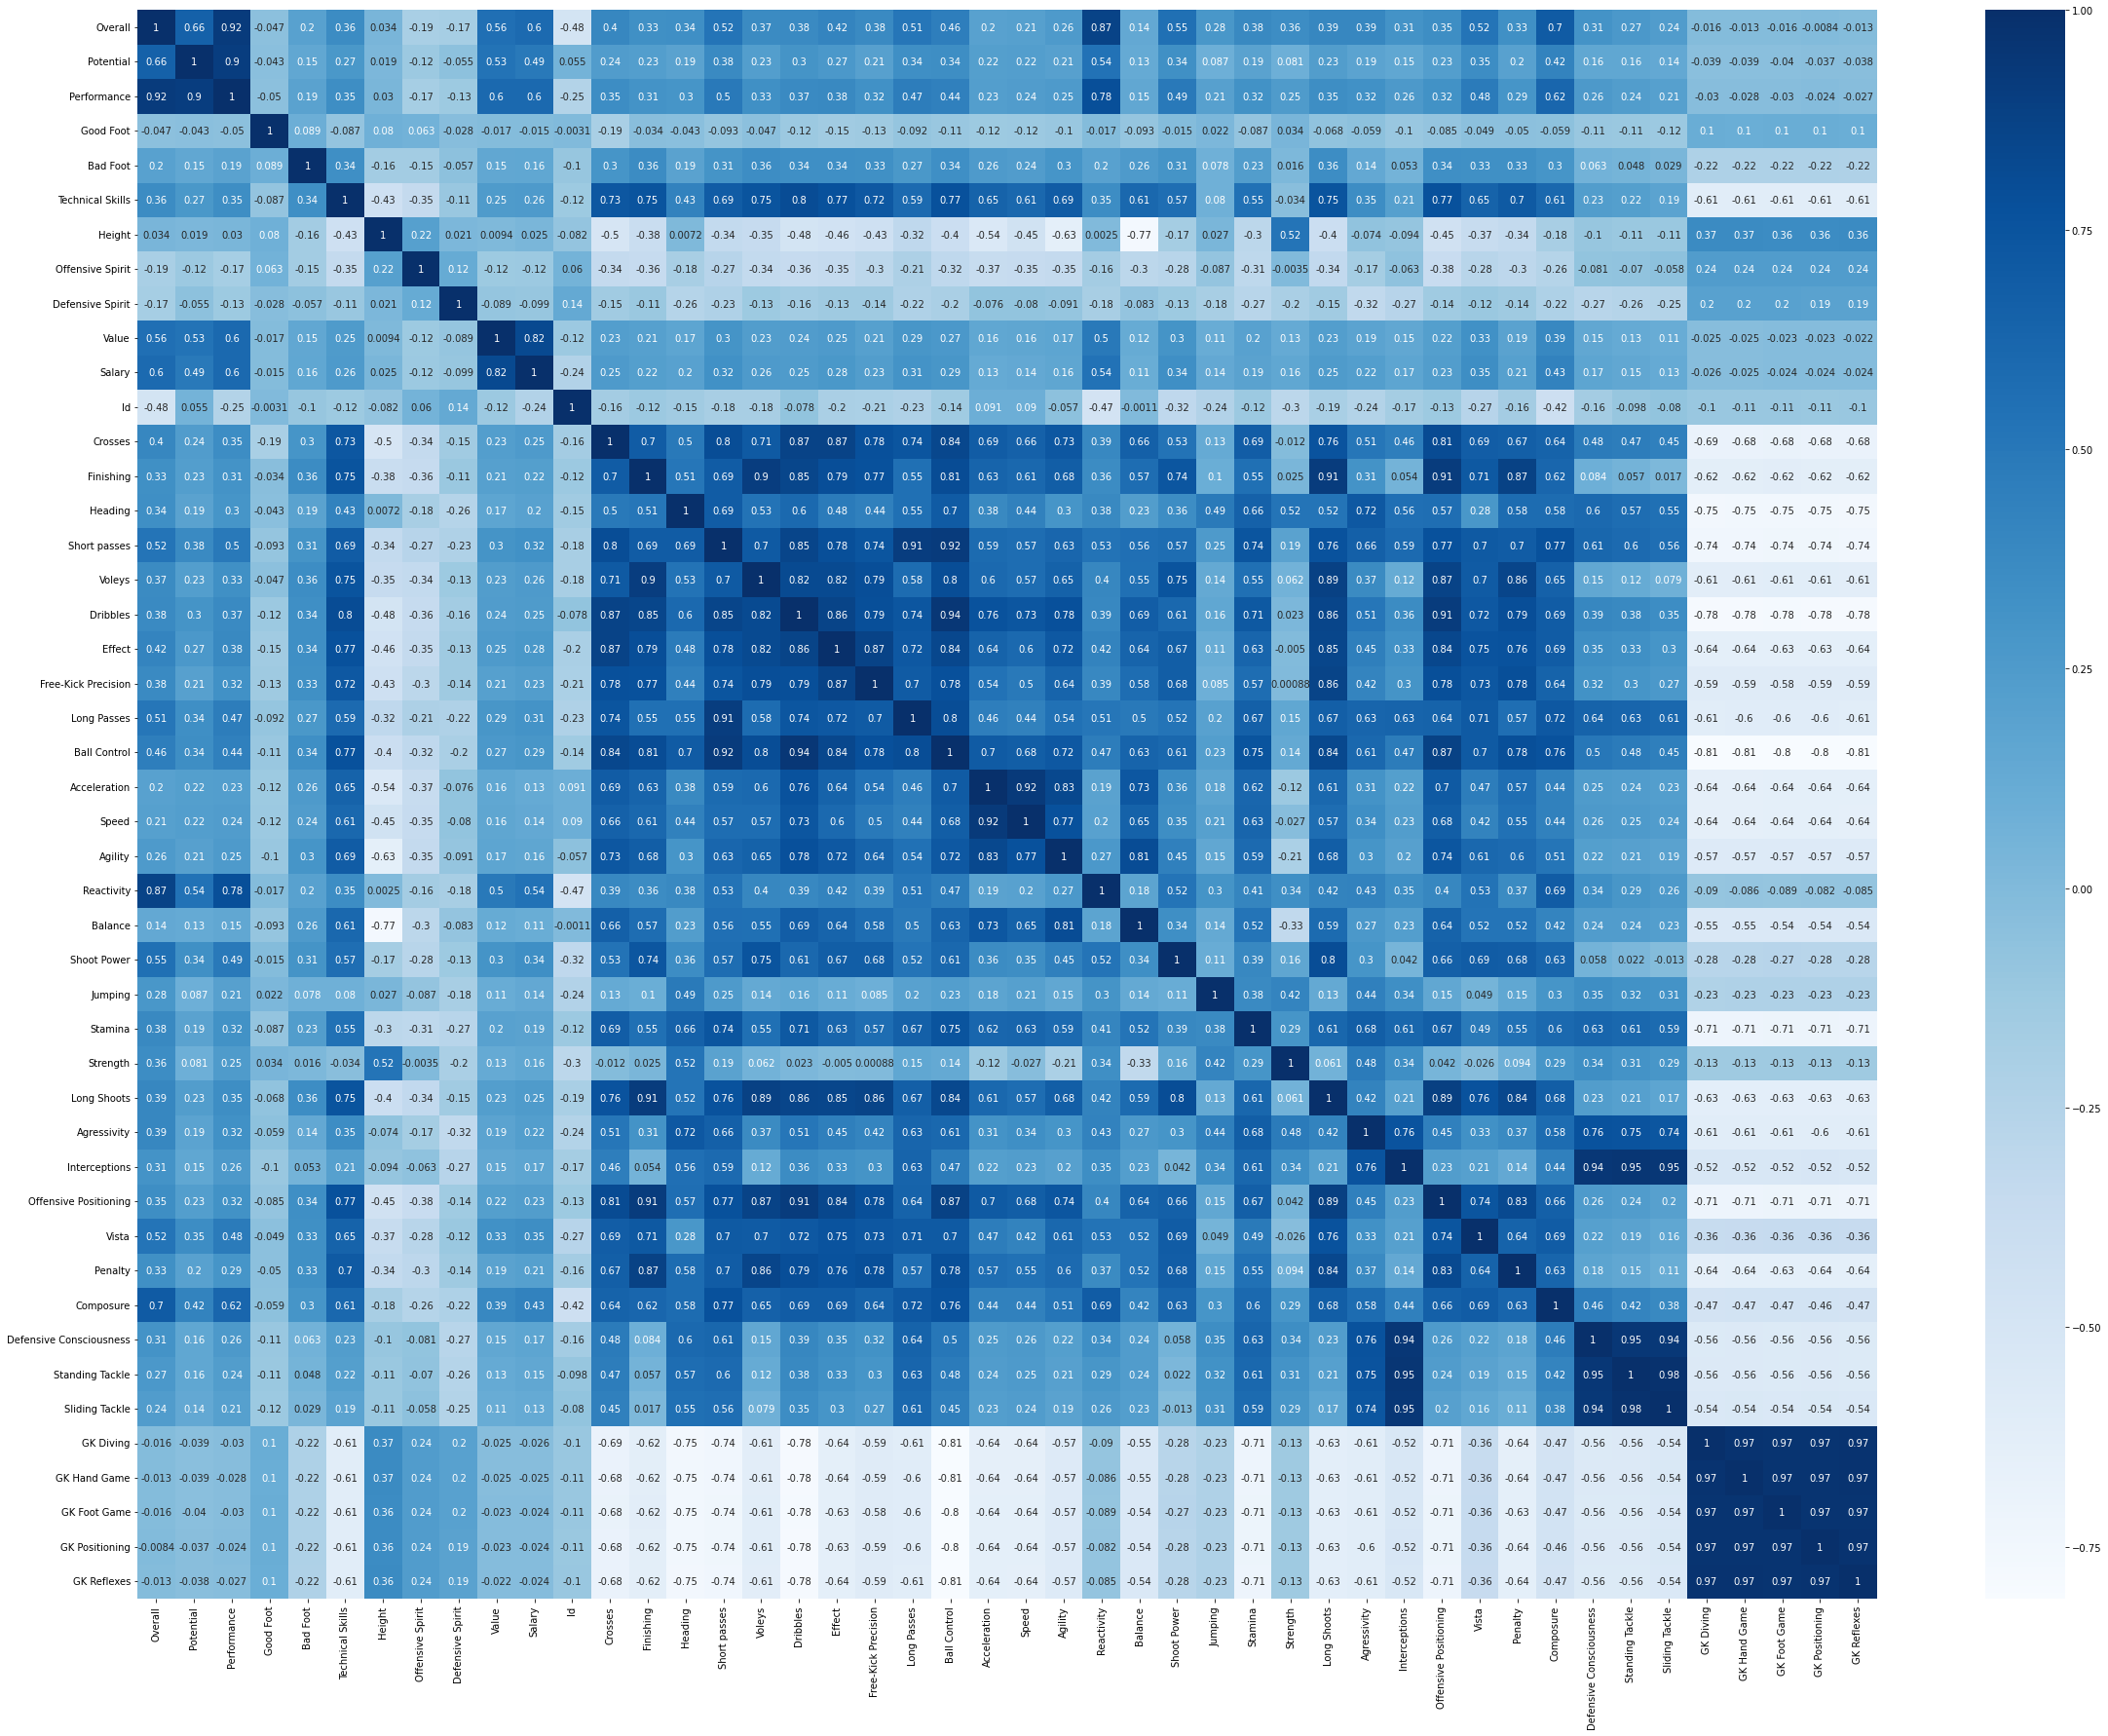

In [22]:
plt.figure(figsize=(40,30))
sns.heatmap(correlation,annot=True,cmap='Blues')

## Plotting histogram to check the distribution of datapoints in the columns 

In [23]:
import plotly.graph_objs as go

columns = ['Potential', 'Performance','Reactivity','Composure']
fig = go.Figure()

for col in columns:
    fig.add_trace(go.Histogram(x=encoded_df[col], name=col))

fig.update_layout(
    title='<b>Distribution of Potential, Performance, Composure, and Reactivity Ratings</b>',
    xaxis_title='Ratings',
    yaxis_title='Count',
    width=900,
    height=400,
    bargap=0.2,
    bargroupgap=0.1,
    showlegend=True,
    title_x=0.5
)

fig.show()


In [24]:
#columns=['Overall','Composure','Reactivity','Potential','Performance','Salary']
#fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
#for i, cols in enumerate(columns[:3]):
#    ax[i].hist(encoded_df[cols])
#    ax[i].set_xlabel(cols)
    
#plt.subplots_adjust(wspace=0.3, hspace=0.3)
#plt.show()

In [25]:
#fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
#for i, cols in enumerate(columns[3:]):
#    ax[i].hist(encoded_df[cols])
#    ax[i].set_xlabel(cols)
    
#plt.subplots_adjust(wspace=0.3, hspace=0.3)
#plt.show()

## Top 10 clubs through overall. 

In [26]:
#top_10 = encoded_df.sort_values(by='Overall', ascending=False).head(10)

top_10 = encoded_df.sort_values('Overall', ascending=False).head(10)

# Sort the dataset by the relevant column in ascending order and select the bottom 10
bottom_10 = df.sort_values('Overall', ascending=True).head(10)

# Concatenate the two dataframes into one
top_bottom_100 = pd.concat([top_10, bottom_10])

NameError: name 'df' is not defined

In [ ]:
fig = px.pie(top_bottom_100, values='Overall', names='Club')
fig.update_layout(title='<b>top Bottom 100 Players Club by Overall Rating</b>',title_x=0.5)
# show the chart
fig.show()

In [ ]:
top_100 = encoded_df.nlargest(100, 'Overall')

# select only the 'name' and 'overall' columns
top_100_names = top_100.loc[:, ['Name', 'Overall']]

# print the top 10 player names and their overall rating value
print(top_100_names)

              Name  Overall
0        K. Mbappé       91
1   R. Lewandowski       91
2       K. Benzema       91
3         L. Messi       91
4     K. De Bruyne       91
..             ...      ...
50     Rafael Leão       84
51       S. Tonali       84
52     F. Valverde       84
53      A. Bastoni       84
54       F. Chiesa       84

[100 rows x 2 columns]


In [ ]:
import plotly.express as px
fig = px.pie(top_100.head(100), values='Overall', names='Club')
fig.update_layout(title='<b>Top 100 Clubs by Overall Rating</b>',title_x=0.5)
# show the chart
fig.show()

## Count of Players in Top 25 Clubs by Overall Rating:

In [ ]:
top_25_clubs = encoded_df.groupby('Club', as_index=False)['Overall'].mean().nlargest(25, 'Overall')['Club'].tolist()

# filter the dataframe for top 10 clubs
df_top_25 = encoded_df[encoded_df['Club'].isin(top_25_clubs)]

# count the number of players in each club
club_counts = df_top_25.groupby('Club').size().reset_index(name='Counts')

# create a bar chart using Plotly express
fig = px.bar(club_counts, x='Club', y='Counts',color_discrete_sequence=['#4e8ef5'])
fig.update_layout(title='<b>Count of Players in Top 25 Clubs by Overall Rating</b>',title_x=0.5)
# show the chart
fig.show()

## Number of Fifa Players by Nationality

In [ ]:
# Count the number of players from each country
country_counts = encoded_df['Country'].value_counts().reset_index(name='count')

# Create a bar chart using Plotly
fig = px.bar(country_counts, x='index', y='count', labels={'index': 'Country', 'count': 'Number of Players'},color_discrete_sequence=['#4e8ef5'])
fig.update_layout(title='<b>Number of FIFA Players by Nationality</b>',title_x=0.5)

# Show the plot
fig.show()

# BarChart:

## Showing the % of Preferred Foot i.e Right or Left:

In [ ]:
foot = encoded_df['Good Foot'].value_counts()
foot

1    13976
0     4470
Name: Good Foot, dtype: int64

In [ ]:
foot_right = foot[1]/encoded_df['Good Foot'].count()*100
foot_left = foot[0]/encoded_df['Good Foot'].count()*100
foot_df = pd.DataFrame({'Percentage':[foot_right,foot_left]},index=['Right Foot','Left Foot'])
foot_df.style.background_gradient(cmap='Blues')

In [ ]:
#Barplot for the classes
import plotly.express as px

fig = px.bar(foot_df, x=foot_df.index, y='Percentage', color='Percentage',
             labels={'Percentage': 'Percentage (%)', 'x': 'Foot Preference'})
fig.update_layout(title='<b>Foot Preference</b>', showlegend=False,title_x=0.5)
fig.update_xaxes(title_text="Foot")
fig.show()

In [ ]:
# Group the data by Name, Long Passes, Short Passes, and Stamina and sort in descending order
grouped_data = encoded_df.groupby(['Name', 'Long Passes', 'Short passes', 'Stamina']).size().reset_index(name='count').sort_values(by=['count'], ascending=False)

# Display the first 10 rows of the grouped data
print(grouped_data.head(10))

                Name  Long Passes  Short passes  Stamina  count
0            A. Abaz           17            17       23      1
12681      M. Zeghba           28            27       25      1
12301       M. Rivas           36            56       58      1
12300   M. Ritzmaier           66            70       74      1
12299  M. Rittmüller           52            63       64      1
12298      M. Ritter           65            66       70      1
12297        M. Rits           75            78       90      1
12296     M. Ritchie           72            75       61      1
12295      M. Ristić           62            70       77      1
12294       M. Risso           34            54       53      1


In [ ]:
import plotly.express as px

# Group the data by Name, Long Passes, Short Passes, and Stamina and count occurrences
grouped_data = encoded_df.groupby(['Name', 'Long Passes', 'Short passes', 'Stamina']).size().reset_index(name='count')

# Create a scatter plot with Long Passes on x-axis, Short Passes on y-axis, Stamina as color, and count as size
fig = px.scatter(grouped_data, x='Long Passes', y='Short passes', color='Stamina', size='count', 
                 hover_name='Name', labels={'Long Passes': 'Long Passes', 'Short passes': 'Short Passes',
                                            'Stamina': 'Stamina', 'count': 'Count'})

fig.update_layout(title='<b>Player Attributes</b>', showlegend=False, title_x=0.5)

fig.show()

## Radar Plot:

In [ ]:
dfg = encoded_df.groupby('Name').mean().sort_values(
    'Overall', ascending=False)

In [ ]:
df10 = dfg[:10].reset_index()
df10

Name  Overall  Potential  Performance  Good Foot  Bad Foot  \
0       K. De Bruyne     91.0       91.0         91.0        1.0       5.0   
1           L. Messi     91.0       91.0         91.0        0.0       4.0   
2         K. Benzema     91.0       91.0         91.0        1.0       4.0   
3          K. Mbappé     91.0       95.0         93.0        1.0       4.0   
4     R. Lewandowski     91.0       91.0         91.0        1.0       4.0   
5        T. Courtois     90.0       91.0         90.5        0.0       3.0   
6           M. Neuer     90.0       90.0         90.0        1.0       4.0   
7        V. van Dijk     90.0       90.0         90.0        1.0       3.0   
8           M. Salah     90.0       90.0         90.0        0.0       3.0   
9  Cristiano Ronaldo     90.0       90.0         90.0        1.0       4.0   

   Technical Skills  Height  Offensive Spirit  Defensive Spirit  ...  Penalty  \
0               4.0   181.0               0.0               0.0  ...     83.0   
1               4.0   169.0               1.0               1.0  ...     75.0   
2               4.0   185.0               2.0               2.0  ...     84.0   
3               5.0   182.0               0.0               1.0  ...     80.0   
4               4.0   185.0               0.0               2.0  ...     90.0   
5               1.0   199.0               2.0               2.0  ...     27.0   
6               1.0   193.0               2.0               2.0  ...     47.0   
7               2.0   193.0               2.0               0.0  ...     62.0   
8               4.0   175.0               0.0               2.0  ...     86.0   
9               5.0   187.0               0.0               1.0  ...     90.0   

   Composure  Defensive Consciousness  Standing Tackle  Sliding Tackle  \
0       89.0                     68.0             65.0            53.0   
1       96.0                     20.0             35.0            24.0   
2       90.0                     43.0             24.0            18.0   
3       88.0                     26.0             34.0            32.0   
4       88.0                     35.0             42.0            19.0   
5       66.0                     20.0             18.0            16.0   
6       70.0                     17.0             10.0            11.0   
7       90.0                     92.0             92.0            86.0   
8       92.0                     38.0             43.0            41.0   
9       95.0                     24.0             32.0            24.0   

   GK Diving  GK Hand Game  GK Foot Game  GK Positioning  GK Reflexes  
0       15.0          13.0           5.0            10.0         13.0  
1        6.0          11.0          15.0            14.0          8.0  
2       13.0          11.0           5.0             5.0          7.0  
3       13.0           5.0           7.0            11.0          6.0  
4       15.0           6.0          12.0             8.0         10.0  
5       84.0          89.0          75.0            89.0         90.0  
6       87.0          88.0          91.0            91.0         88.0  
7       13.0          10.0          13.0            11.0         11.0  
8       14.0          14.0           9.0            11.0         14.0  
9        7.0          11.0          15.0            14.0         11.0  

[10 rows x 47 columns]

In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np
from sklearn import preprocessing

# Select the 5 players you want to plot
players=[]
for i in df10['Name'][:5]:
    players.append(i)
    
# Define the feature columns to be plotted on the radar chart
features = ['Crosses', 'Finishing', 'Voleys', 'Ball Control', 'Speed','Agility','Reactivity','Balance','Shoot Power','Jumping','Stamina','Strength','Interceptions','Defensive Consciousness','Standing Tackle','Crosses']

# Normalize the feature values between 0 and 1 using min-max scaling
min_max_scaler = preprocessing.MinMaxScaler()
df10[features] = min_max_scaler.fit_transform(df10[features])

# Define the angles for each feature to be plotted on the radar chart
angles = np.linspace(0, 2*np.pi, len(features), endpoint=False)

# Create a trace for each player using the normalized feature values and the defined angles  
data1 = []
for player in players:
    values = df10.loc[df10['Name'] == player, features].values.flatten().tolist()
    values += values[:1]
    data1.append(go.Scatterpolar(r=values, theta=features, fill='toself', name=player))

# Create the subplots with the specified layout
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2], horizontal_spacing=0.2)

# Add the traces to the subplots
for trace in data1[:2]:
    fig.add_trace(trace, row=1, col=1)
    
for trace in data1[2:]:
    fig.add_trace(trace, row=1, col=2)

# Set the layout for the subplots
fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0, 1])), showlegend=True, title='<b>Top 5 FIFA Player Attributes</b>')
fig.update_layout(title_x=0.5)

# Show the plot
fig.show()


## The best starting lineup based on overall rating:

In [27]:
import pandas as pd

# Group the data by club and calculate the mean overall rating for each club
club_ratings = encoded_df.groupby('Club')['Overall'].mean().reset_index()

# Sort the data in descending order based on overall rating
club_ratings = club_ratings.sort_values('Overall', ascending=False)

# Get the top club with the highest overall rating
best_club = club_ratings.iloc[0]['Club']

# Select the players from the best club and sort them based on their overall rating
#best_players = encoded_df[encoded_df['Club'] == best_club].sort_values('Overall', ascending=False)

#print(best_players[['Name', 'Overall']].head(11))
sorted_data = encoded_df.sort_values('Overall', ascending=False)

# Get the top 11 players based on Overall rating
best_team = sorted_data.iloc[:11]

# Format the table of the best team
best_team_table = best_team[['Name', 'Club', 'Overall']].reset_index(drop=True)
best_team_table.index += 1
best_team_table = best_team_table.style.hide_index().format({'Overall': '{:.1f}'}).background_gradient(cmap='Blues')

# Display the best team and its table
print(f"The best team is {best_club} with an overall rating of {club_ratings.iloc[0]['Overall']:.2f}\n")
print("The Best starting lineup based on overall rating is:\n")
display(best_team_table)

The best team is France with an overall rating of 86.00

The Best starting lineup based on overall rating is:



## Outlier Detection

In [28]:
numeric_data=encoded_df.select_dtypes(include=np.number)

In [29]:
len(numeric_data.columns)

46

In [30]:
numeric_data.columns

Index(['Overall', 'Potential', 'Performance', 'Good Foot', 'Bad Foot',
       'Technical Skills', 'Height', 'Offensive Spirit', 'Defensive Spirit',
       'Value', 'Salary', 'Id', 'Crosses', 'Finishing', 'Heading',
       'Short passes', 'Voleys', 'Dribbles', 'Effect', 'Free-Kick Precision',
       'Long Passes', 'Ball Control', 'Acceleration', 'Speed', 'Agility',
       'Reactivity', 'Balance', 'Shoot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shoots', 'Agressivity', 'Interceptions',
       'Offensive Positioning', 'Vista', 'Penalty', 'Composure',
       'Defensive Consciousness', 'Standing Tackle', 'Sliding Tackle',
       'GK Diving', 'GK Hand Game', 'GK Foot Game', 'GK Positioning',
       'GK Reflexes'],
      dtype='object')

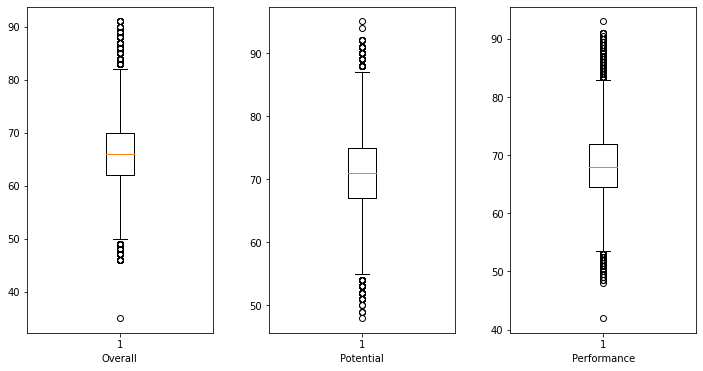

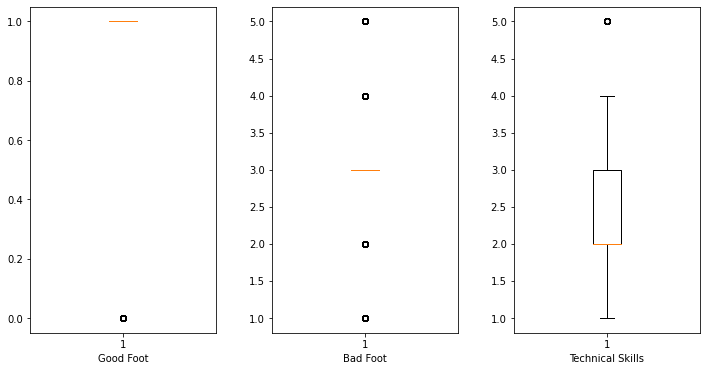

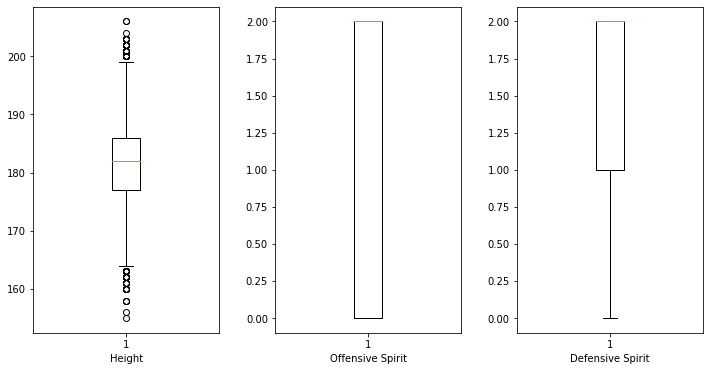

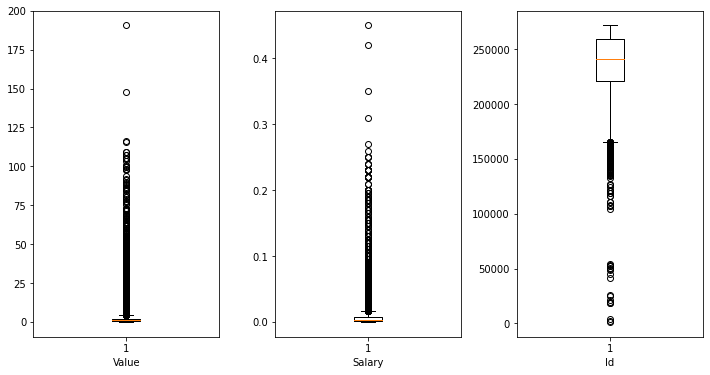

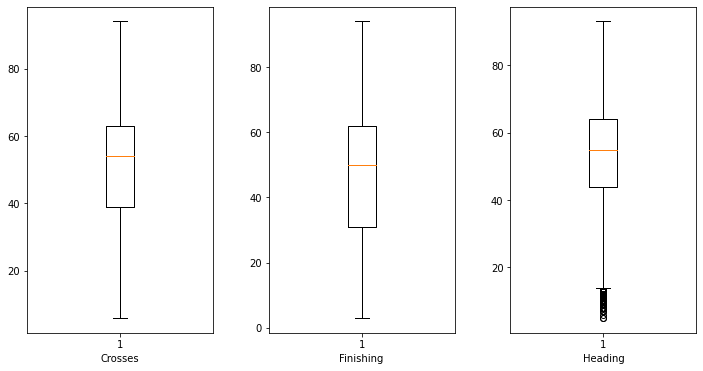

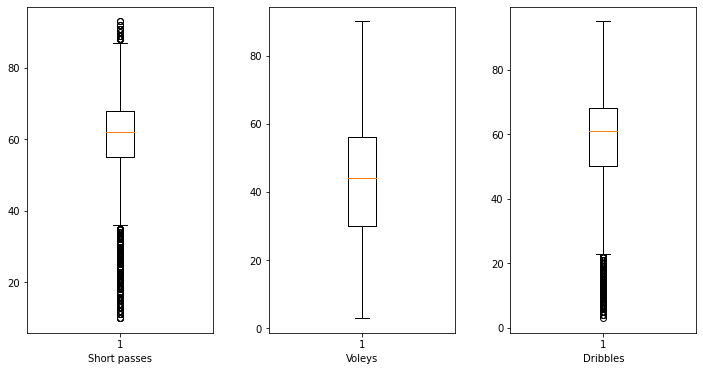

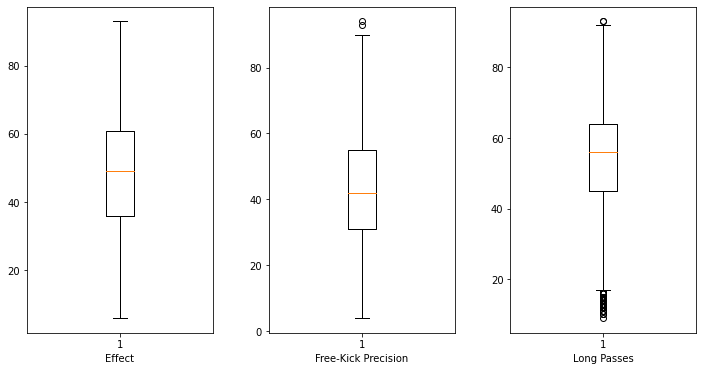

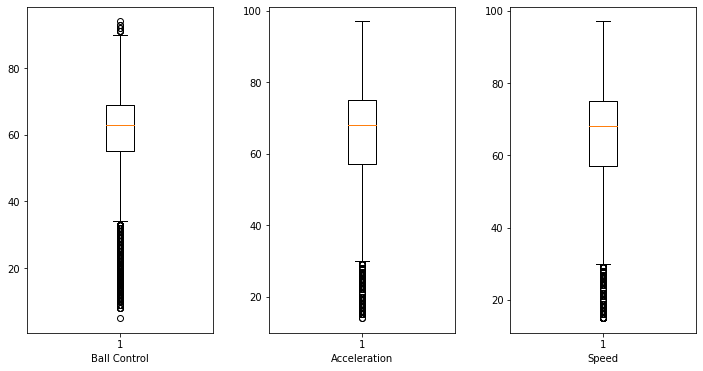

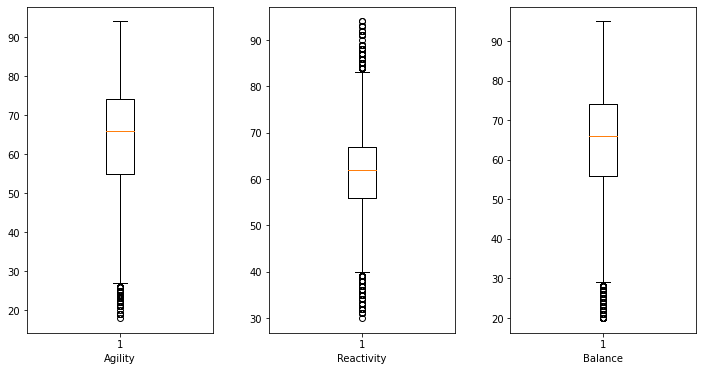

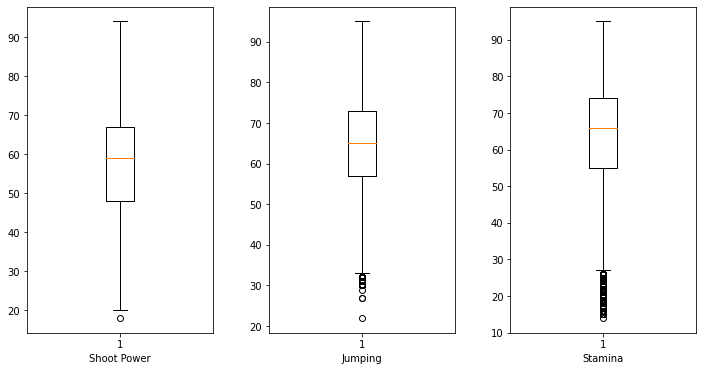

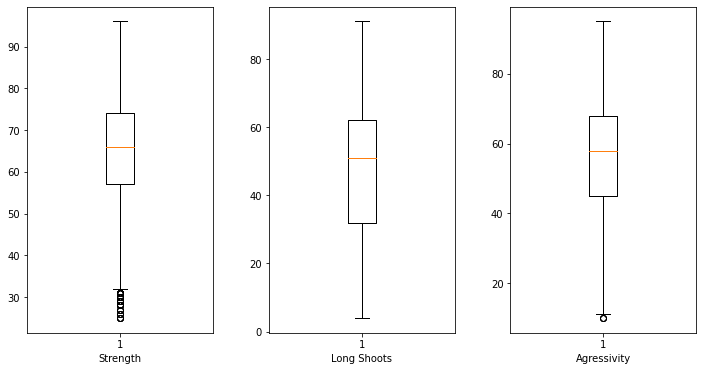

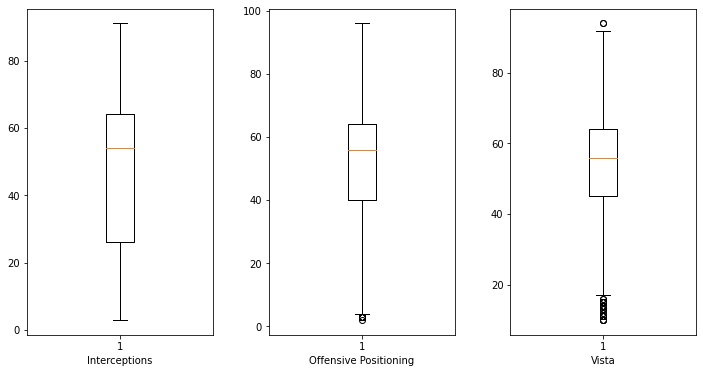

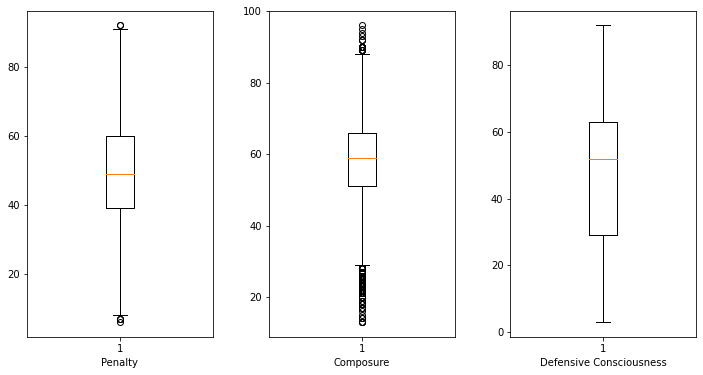

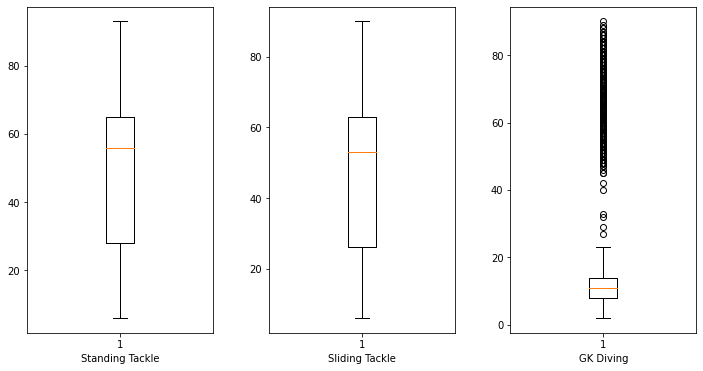

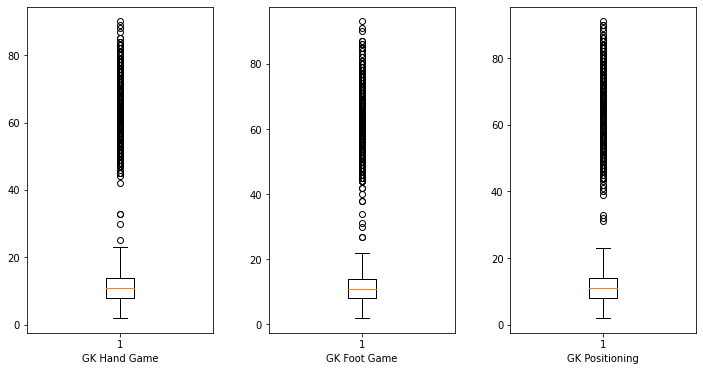

In [31]:
c=0
for i in range(int(len(numeric_data.columns)/3)):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
    outlier_cols = numeric_data.columns[c:c+3]
    for i, cols in enumerate(outlier_cols):
        ax[i].boxplot(numeric_data[cols])
        ax[i].set_xlabel(cols)
    
    plt.subplots_adjust(wspace=.3, hspace=.3)
    plt.show()
    c+=3

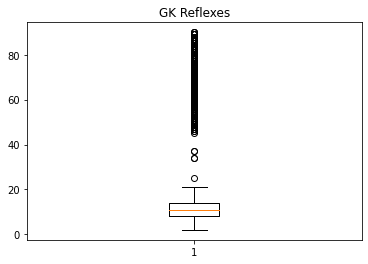

In [32]:
plt.boxplot(encoded_df['GK Reflexes'])
plt.title('GK Reflexes')
plt.show()

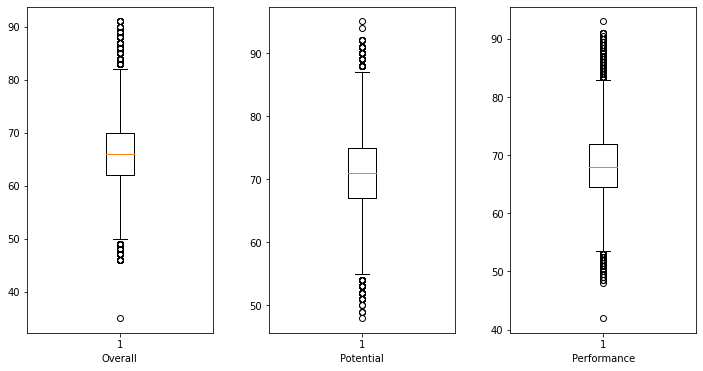

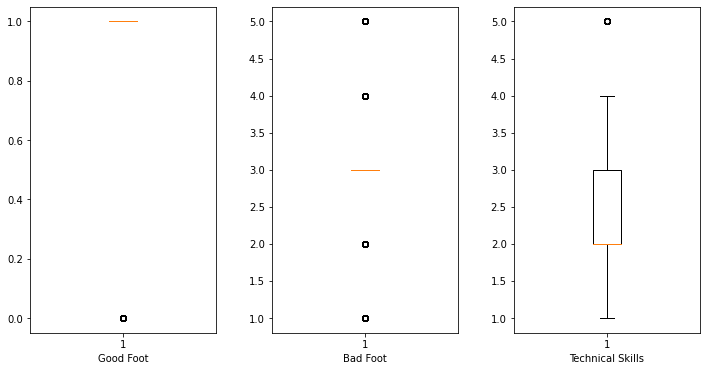

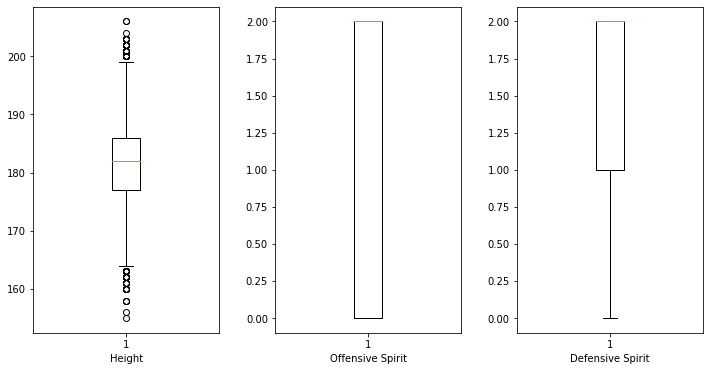

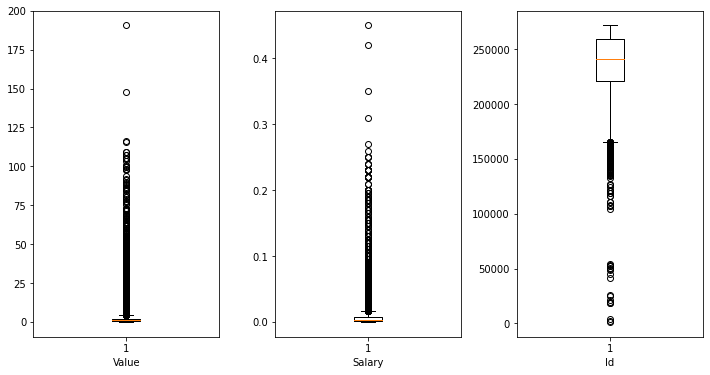

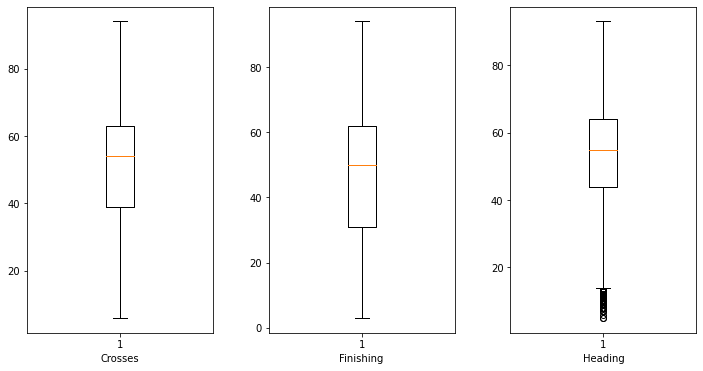

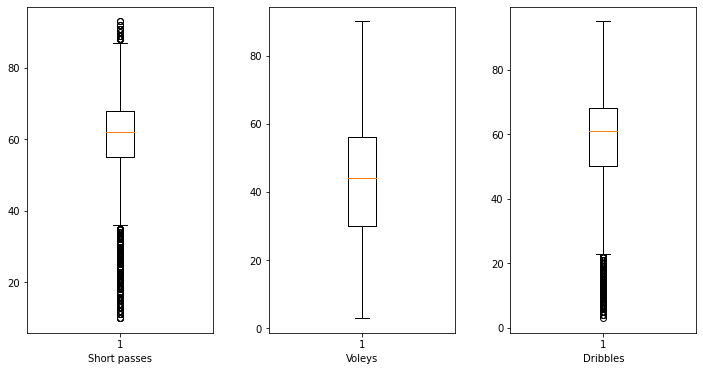

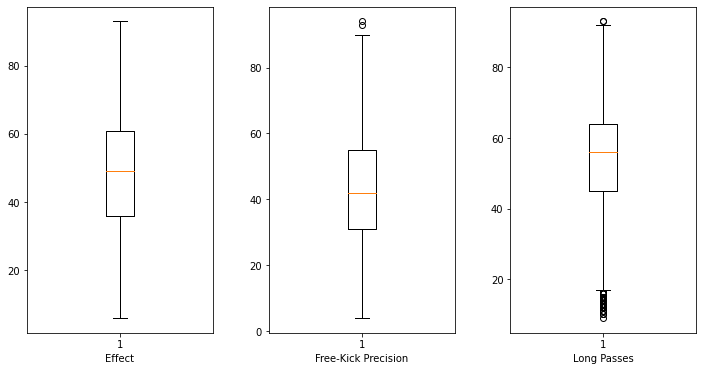

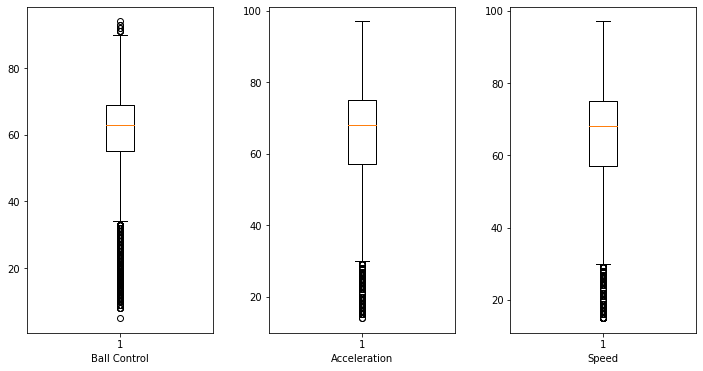

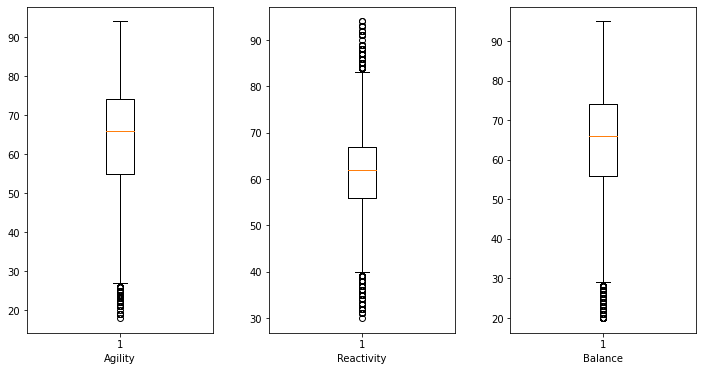

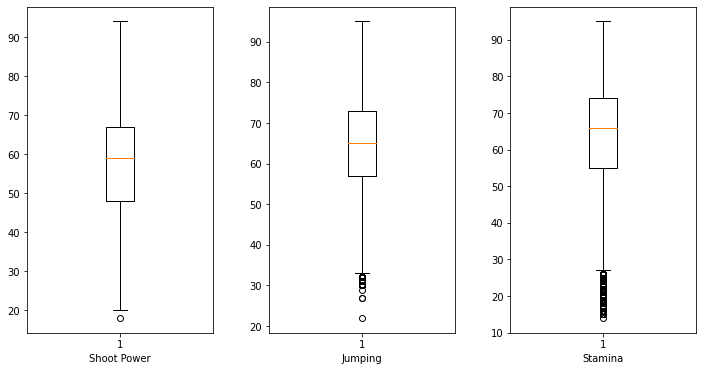

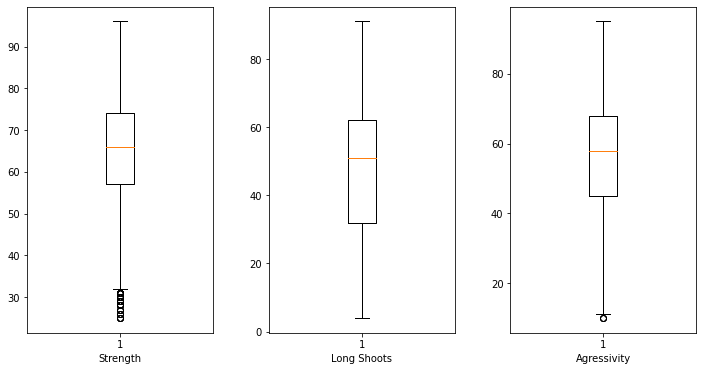

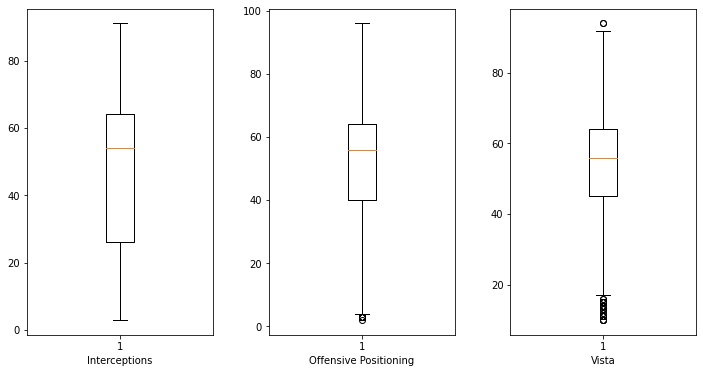

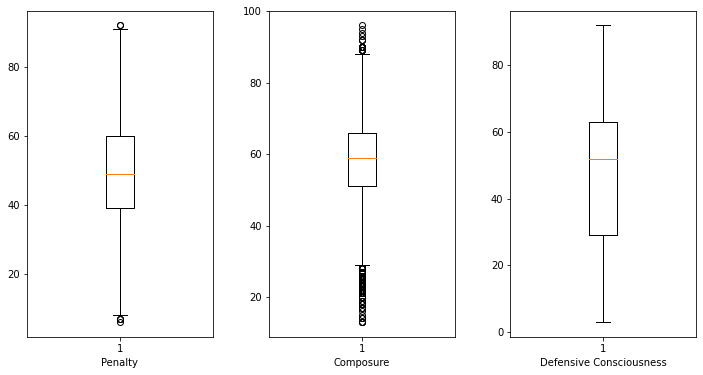

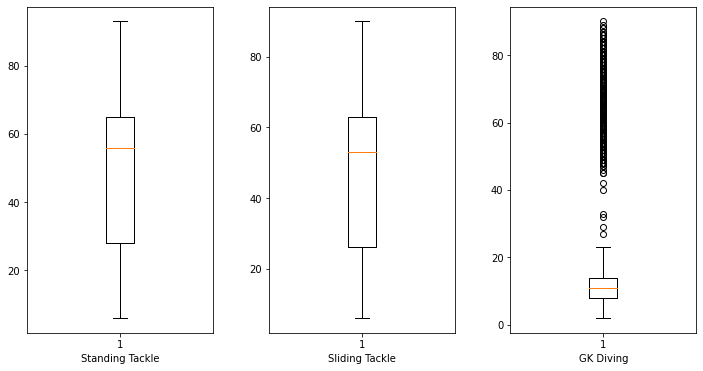

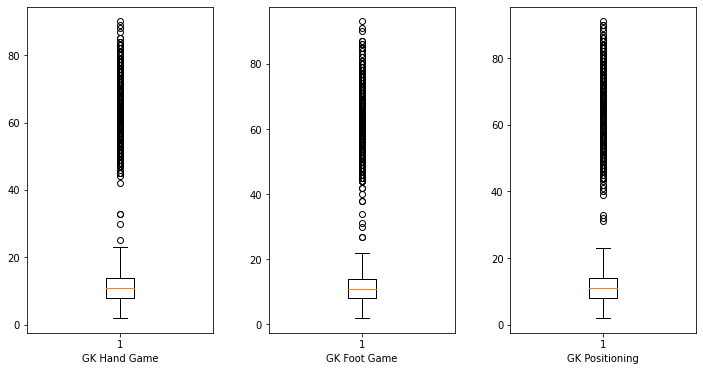

In [33]:
c=0
for i in range(int(len(numeric_data.columns)/3)):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
    outlier_cols = numeric_data.columns[c:c+3]
    for i, cols in enumerate(outlier_cols):
        ax[i].boxplot(numeric_data[cols])
        ax[i].set_xlabel(cols)
    
    plt.subplots_adjust(wspace=.3, hspace=.3)
    plt.show()
    c+=3

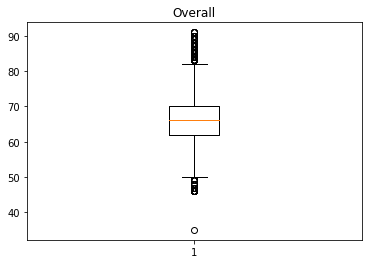

In [34]:
plt.boxplot(numeric_data['Overall'])
plt.title('Overall')
plt.show()

In [35]:
encoded_df.shape

(18446, 49)

In [36]:
fifa23 = encoded_df.drop(['Name', 'Overall', 'Potential', 'Club', 'Height', 'Country', 'Good Foot', 'Salary', 'Value', 'Id'], axis=1)

## Seperating Features and target

In [37]:
X = fifa23.iloc[:,1:-1]
y = fifa23.iloc[:, 0:1] #Performance is target

In [38]:
X.shape

(18446, 37)

## Encoding Ordinal Column

In [39]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(X.iloc[:, 2:4])
X.iloc[:, 2:4] = enc.transform(X.iloc[:, 2:4])

## Splitting Dataset into Training and Test set

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## SVM Regressor

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

#Transform test set
X_test = sc_X.transform(X_test)
y_test = sc_y.transform(y_test)

### Feature Selection

In [43]:
print(X.shape)
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X = selector.fit_transform(X)
print(X.shape)
#
'''
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,10))
matrix=np.corrcoef(X)
sns.heatmap(matrix, annot = true, cmap=plt.cm.CMRmap_r)
plt.show()'''
#Takes to much time

(18446, 37)
(18446, 37)


'\nimport seaborn as sns \nimport matplotlib.pyplot as plt\nimport numpy as np\nplt.figure(figsize=(12,10))\nmatrix=np.corrcoef(X)\nsns.heatmap(matrix, annot = true, cmap=plt.cm.CMRmap_r)\nplt.show()'

### Applying PCA

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 30) #Reduced to 30 features using PCA
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [45]:
from sklearn.svm import SVR # non-linear
regressor = SVR(kernel = 'rbf')

In [46]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[1], 'kernel':['rbf'], 'gamma':['scale'], 'epsilon':[0.15,0.2,0.25,0.3]}]
grid_search = GridSearchCV(estimator=regressor, 
                           param_grid=parameters,
                           scoring='r2',
                           cv=10,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:",best_parameters)

c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Best Accuracy: 87.49 %
Best Parameters: {'C': 1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}


In [47]:
regressor = SVR(kernel='rbf', C=1, epsilon=0.2, gamma='scale')
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



KeyboardInterrupt: 

In [ ]:
y_pred = grid_search.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.870035651302147

In [ ]:
y_test

array([[ 0.19386614],
       [ 0.19386614],
       [-0.22906241],
       ...,
       [-0.9057481 ],
       [ 0.87055182],
       [ 0.95513753]])